In [64]:
import pandas as pd

# Load generated dataset
df = pd.read_csv("energy_data.csv")

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

mean_values = df.mean(numeric_only=True)
print("\nMean Values:")
print(mean_values)

std_values = df.std(numeric_only=True)
print("\nStandard Deviation:")
print(std_values)

print("\nStatistical Summary:")
print(df.describe())


Dataset Shape: (4321, 6)

First 5 rows:
             timestamp  fridge  ac  lights  microwave  total_power
0  2023-01-01 00:00:00       0   0      48        948          996
1  2023-01-01 01:00:00       0   0      21          0           21
2  2023-01-01 02:00:00     156   0      65          0          221
3  2023-01-01 03:00:00      58   0      76          0          134
4  2023-01-01 04:00:00     160   0      44          0          204

Mean Values:
fridge           87.707938
ac              783.892155
lights           31.996066
microwave       100.521870
total_power    1004.118028
dtype: float64

Standard Deviation:
fridge          68.354389
ac             922.363100
lights          34.134344
microwave      302.621982
total_power    962.944179
dtype: float64

Statistical Summary:
            fridge           ac       lights    microwave  total_power
count  4321.000000  4321.000000  4321.000000  4321.000000  4321.000000
mean     87.707938   783.892155    31.996066   100.521870  1004.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [66]:
df = pd.read_csv("energy_data.csv")

print("Dataset Loaded Successfully!")
print("Shape:", df.shape)

Dataset Loaded Successfully!
Shape: (4321, 6)


In [67]:
print("\nFirst 5 rows:")
print(df.head())

print("\nColumn Names:")
print(df.columns)

print("\nData Types:")
print(df.dtypes)


First 5 rows:
             timestamp  fridge  ac  lights  microwave  total_power
0  2023-01-01 00:00:00       0   0      48        948          996
1  2023-01-01 01:00:00       0   0      21          0           21
2  2023-01-01 02:00:00     156   0      65          0          221
3  2023-01-01 03:00:00      58   0      76          0          134
4  2023-01-01 04:00:00     160   0      44          0          204

Column Names:
Index(['timestamp', 'fridge', 'ac', 'lights', 'microwave', 'total_power'], dtype='str')

Data Types:
timestamp        str
fridge         int64
ac             int64
lights         int64
microwave      int64
total_power    int64
dtype: object


In [68]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
timestamp      0
fridge         0
ac             0
lights         0
microwave      0
total_power    0
dtype: int64


In [69]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
print("\nTimestamp Converted Successfully!")


Timestamp Converted Successfully!


In [70]:
df.set_index('timestamp', inplace=True)
print("Index Set as Timestamp")

Index Set as Timestamp


In [71]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
            fridge           ac       lights    microwave  total_power
count  4321.000000  4321.000000  4321.000000  4321.000000  4321.000000
mean     87.707938   783.892155    31.996066   100.521870  1004.118028
std      68.354389   922.363100    34.134344   302.621982   962.944179
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000     0.000000   120.000000
50%      93.000000     0.000000    25.000000     0.000000   959.000000
75%     148.000000  1664.000000    62.000000     0.000000  1860.000000
max     199.000000  2497.000000    99.000000  1199.000000  3857.000000


In [72]:
print("\nMean Values:")
print(df.mean())

print("\nStandard Deviation:")
print(df.std())


Mean Values:
fridge           87.707938
ac              783.892155
lights           31.996066
microwave       100.521870
total_power    1004.118028
dtype: float64

Standard Deviation:
fridge          68.354389
ac             922.363100
lights          34.134344
microwave      302.621982
total_power    962.944179
dtype: float64


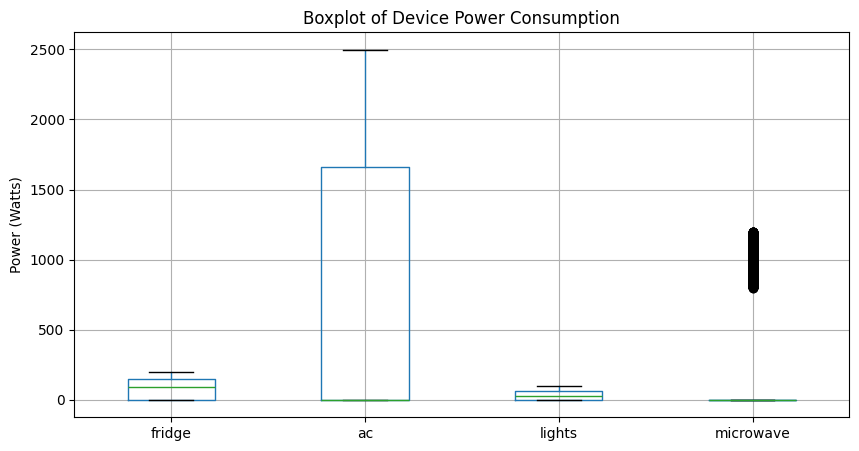

In [73]:
plt.figure(figsize=(10,5))
df[['fridge','ac','lights','microwave']].boxplot()
plt.title("Boxplot of Device Power Consumption")
plt.ylabel("Power (Watts)")
plt.show()

In [74]:
df.fillna(0, inplace=True)
print("Missing Values Handled")

Missing Values Handled


In [75]:
daily_data = df.resample('D').mean()

print("\nDaily Resampled Data:")
print(daily_data.head())


Daily Resampled Data:
               fridge          ac     lights   microwave  total_power
timestamp                                                            
2023-01-01  75.541667    0.000000  33.875000   85.833333   195.250000
2023-01-02  82.375000  187.375000  35.250000  247.958333   552.958333
2023-01-03  84.583333  124.833333  36.416667   88.875000   334.708333
2023-01-04  78.125000  143.833333  30.541667   42.250000   294.750000
2023-01-05  70.333333    0.000000  34.500000   80.750000   185.583333


In [76]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_data, 
                         columns=df.columns, 
                         index=df.index)

print("\nData Normalized Successfully!")
print(scaled_df.head())


Data Normalized Successfully!
                       fridge   ac    lights  microwave  total_power
timestamp                                                           
2023-01-01 00:00:00  0.000000  0.0  0.484848   0.790659     0.258232
2023-01-01 01:00:00  0.000000  0.0  0.212121   0.000000     0.005445
2023-01-01 02:00:00  0.783920  0.0  0.656566   0.000000     0.057298
2023-01-01 03:00:00  0.291457  0.0  0.767677   0.000000     0.034742
2023-01-01 04:00:00  0.804020  0.0  0.444444   0.000000     0.052891


In [77]:
train_size = int(len(df) * 0.8)

train = df.iloc[:train_size]
test = df.iloc[train_size:]

print("\nTraining Set Size:", train.shape)
print("Testing Set Size:", test.shape)


Training Set Size: (3456, 5)
Testing Set Size: (865, 5)


In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

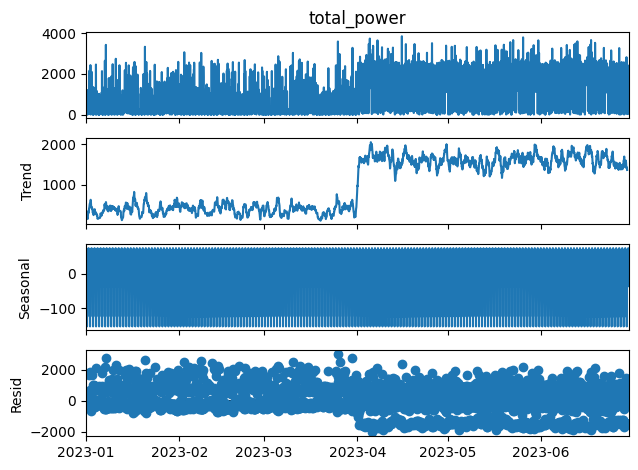

In [79]:
result = seasonal_decompose(df['total_power'], model='additive', period=24)
result.plot()
plt.show()

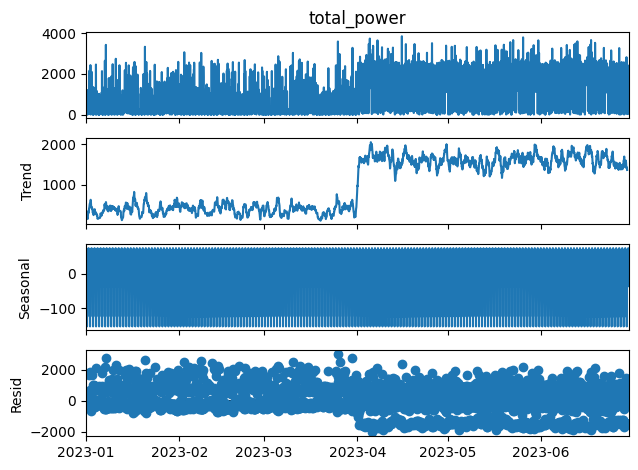

In [80]:
result = seasonal_decompose(df['total_power'], model='additive', period=24)

result.plot()
plt.show()

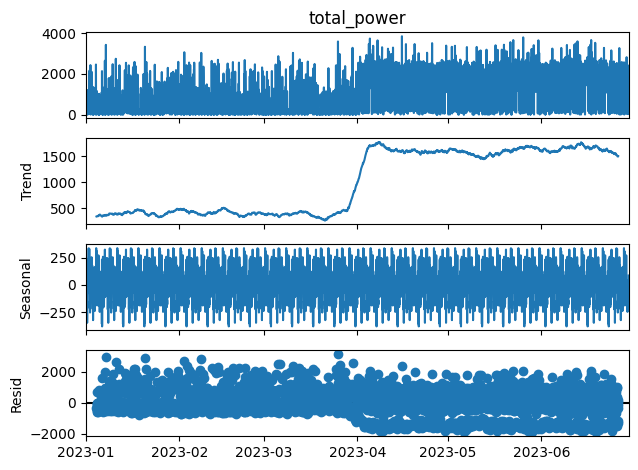

In [81]:
result_week = seasonal_decompose(df['total_power'], model='additive', period=168)
result_week.plot()
plt.show()